<div style="color:white;background-color:#0B244E;padding:20px;width:100%">
<img src="https://www.eseg.edu.br/assets/dist/assets/images/logo/136x136.svg" style=""></img>
</div>
<div style="color:white;background-color:#0B244E;padding:20px;width:100%;border-top: 1px solid white">
Data Science 1 / Prof. Fernando Pablos
</div>

<h1>Análise Exploratória - Exercícios</h1>




<p>Exercício 1 - Realize a importação do arquivo dataset_vendas_online.csv</p>

In [1]:
import pandas as pd

df = pd.read_csv('dataset_vendas_online.csv')
df.head()

,col1,col2,catA,catB,num1,num2
0,174.84,3.0,Beleza,Pix,34.0,7.76
1,143.09,32.0,Beleza,Pix,40.0,4.94
2,182.38,3.0,Eletrônico,Pix,41.0,9.91
3,226.15,27.0,Beleza,Cartão Débito,62.0,22.70
4,138.29,29.0,Beleza,Cartão Credito,36.0,15.58


<p>Exercício 2 - Os nomes das colunas são muito esquisitos. Após consultarmos o analista responsável pela planilha, ele nos explicou que:</p>
<ul>
<li>col1 é o preço do produto</li>
<li>col2 é a quantidade vendida</li>
<li>catA é a categoria do produto</li>
<li>catB é o meio de pagamento</li>
<li>num1 é a idade do cliente</li>
<li>num2 é o valor do desconto aplicado</li>
</ul>

<p>Corrija os nomes das colunas</p>

In [3]:
df = df.rename(columns={'col1': 'Preço do produto', 'col2': 'Quantidade vendida', 'catA': 'Categoria', 'catB': 'Meio de pagamento', 'num1': 'Idade do cliente', 'num2': 'Desconto'})
df.head()

,Preço do produto,Quantidade vendida,Categoria,Meio de pagamento,Idade do cliente,Desconto
0,174.84,3.0,Beleza,Pix,34.0,7.76
1,143.09,32.0,Beleza,Pix,40.0,4.94
2,182.38,3.0,Eletrônico,Pix,41.0,9.91
3,226.15,27.0,Beleza,Cartão Débito,62.0,22.70
4,138.29,29.0,Beleza,Cartão Credito,36.0,15.58


<p style="color:blue; background-color:gray">Vamos observar mais a fundo nossa planilha:</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Preço do produto    360 non-null    float64
 1   Quantidade vendida  382 non-null    float64
 2   Categoria           450 non-null    object 
 3   Meio de pagamento   450 non-null    object 
 4   Idade do cliente    405 non-null    float64
 5   Desconto            450 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.2+ KB


<p>Exercício 3 - Precisamos tratar os dados faltantes.</p>
<p>No caso do preço do produto, vamos atribuir a mediana</p>
<p>Na quantidade vendida, a média</p>
<p>Na idade do cliente, a moda</p>


In [5]:
mediana_preco = df['Preço do produto'].median()
df['Preço do produto'] = df['Preço do produto'].fillna(mediana_preco)

media_quantidade_vendida = df['Quantidade vendida'].mean()
df['Quantidade vendida'] = df['Quantidade vendida'].fillna(media_quantidade_vendida)

moda_idade_cliente = df['Idade do cliente'].mode()
df['Idade do cliente'] = df['Idade do cliente'].fillna(moda_idade_cliente[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Preço do produto    450 non-null    float64
 1   Quantidade vendida  450 non-null    float64
 2   Categoria           450 non-null    object 
 3   Meio de pagamento   450 non-null    object 
 4   Idade do cliente    450 non-null    float64
 5   Desconto            450 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.2+ KB


<p>Exercício 4 - Vamos analisar nossos dados categóricos, a saber: Categoria e Meio de Pagamento. Crie gráficos de barras para essas colunas para observar se está tudo ok.</p>

<Axes: xlabel='Categoria'>

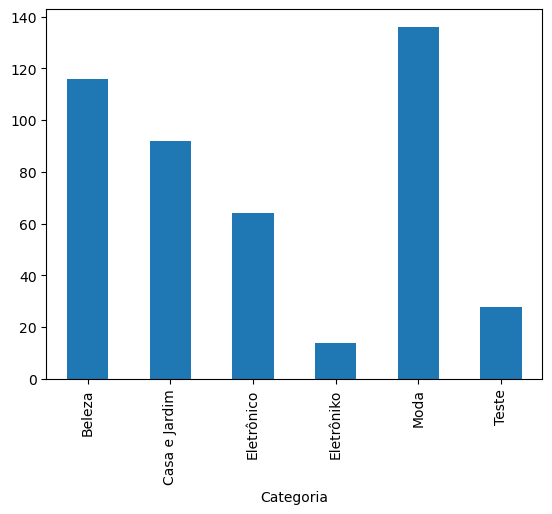

In [6]:
import seaborn as sns
grupo_categoria = df.groupby(['Categoria']).size()
grupo_categoria.plot.bar()
#sns.barplot(data=grupo_categoria)

<Axes: xlabel='Meio de pagamento'>

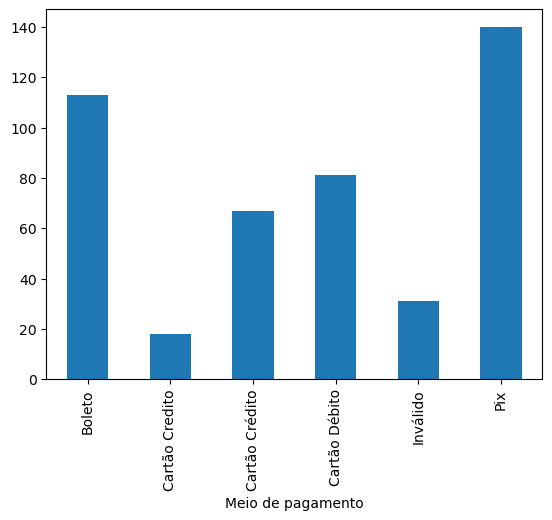

In [7]:
grupo_pagamento = df.groupby(['Meio de pagamento']).size()
grupo_pagamento.plot.bar()
#sns.barplot(data=grupo_pagamento)

<p>Exercício 5 - Remova os valores equivocados e unifique valores que foram digitados incorretamente</p>

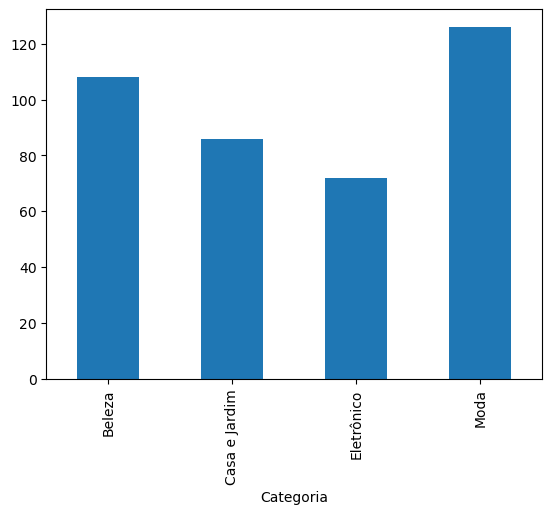

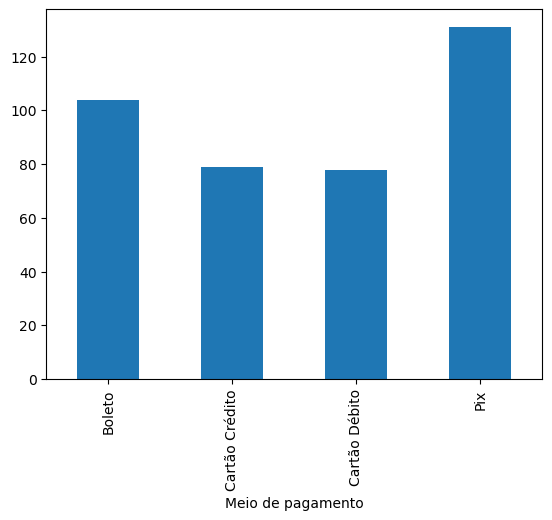

In [8]:
import matplotlib.pyplot as plt

df = df[df['Categoria'] != 'Teste']
df = df[df['Meio de pagamento'] != 'Inválido']

df['Categoria'] = df['Categoria'].replace({
    "Eletrôniko": "Eletrônico"
})

df['Meio de pagamento'] = df['Meio de pagamento'].replace({
    "Cartão Credito": "Cartão Crédito"
})

grupo_categoria = df.groupby(['Categoria']).size()
grupo_categoria.plot.bar()
plt.show()

grupo_pagamento = df.groupby(['Meio de pagamento']).size()
grupo_pagamento.plot.bar()
plt.show()


<p>Exercício 6 - Vamos descrever (describe) os dados numéricos</p>

In [9]:
df.describe()

,Preço do produto,Quantidade vendida,Idade do cliente,Desconto
count,392.000000,392.000000,392.000000,392.000000
mean,2703.114643,24.650357,43.459184,15.554898
std,50499.943590,13.252297,15.426200,10.021797
min,19.010000,1.000000,-20.000000,0.050000
25%,126.800000,14.000000,34.000000,8.442500
50%,152.960000,24.835079,40.500000,15.325000
75%,174.660000,34.000000,56.000000,22.737500
max,999999.990000,49.000000,150.000000,120.000000


<p>Exercício 7 - Agora analise esses dados gerando boxplots e histogramas para os que parecem ter problemas e depois corrija os problemas identificados</p>

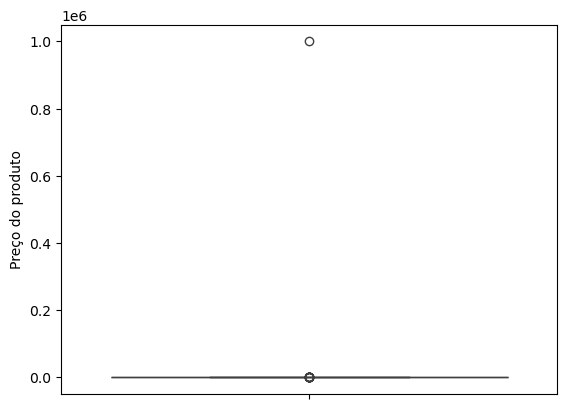

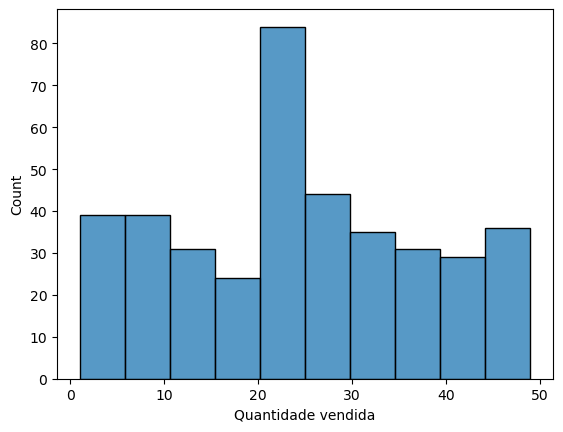

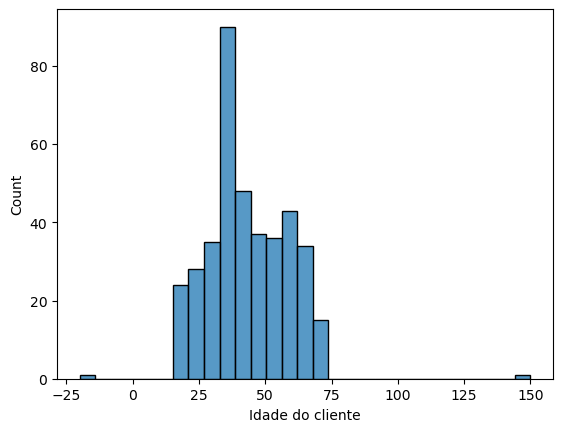

In [10]:
sns.boxplot(df['Preço do produto'])
plt.show()
sns.histplot(df['Quantidade vendida'])
plt.show()
sns.histplot(df['Idade do cliente'])
plt.show()


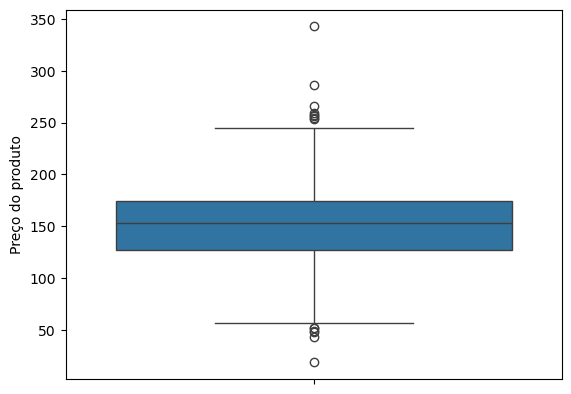

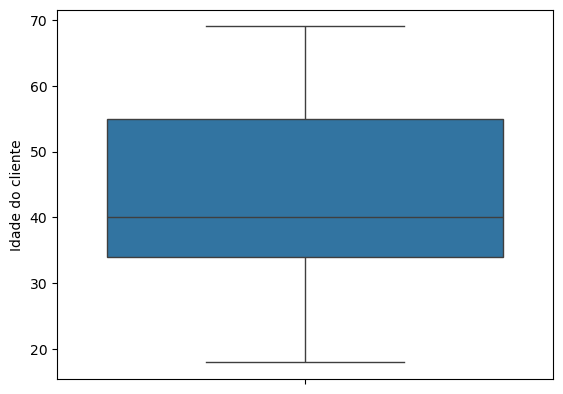

In [11]:
df = df[df['Preço do produto'] < 10000]
sns.boxplot(df['Preço do produto'])
plt.show()
df = df[(df['Idade do cliente'] > 0) & (df['Idade do cliente'] <= 100)]
sns.boxplot(df['Idade do cliente'])
plt.show()


<p>Exercício 8 - Verifique se há alguma correlação entre as variáveis numéricas por meio de correlação e diagrama de dispersão</p>

,Desconto,Preço do produto,Idade do cliente
Desconto,1.000000,0.035886,0.123174
Preço do produto,0.035886,1.000000,0.004328
Idade do cliente,0.123174,0.004328,1.000000


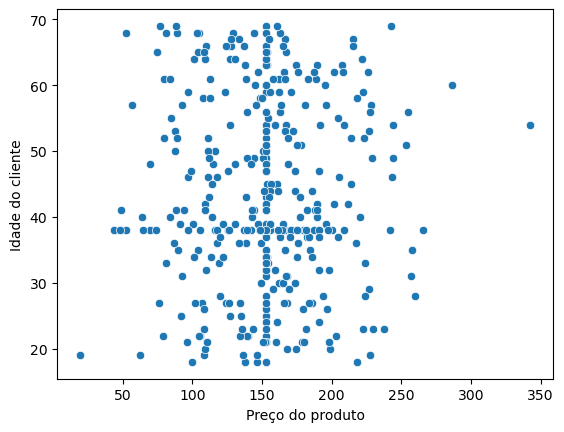

<Axes: xlabel='Idade do cliente', ylabel='Desconto'>

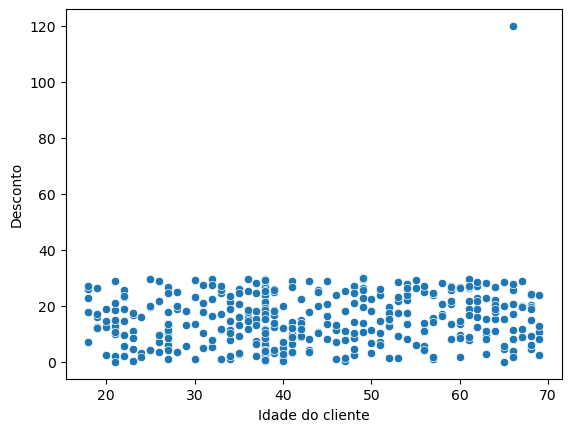

In [18]:
variaveis_correlacao = df[['Desconto', 'Preço do produto', 'Idade do cliente']]
display(variaveis_correlacao.corr())

sns.scatterplot(data=variaveis_correlacao, x='Preço do produto', y='Idade do cliente')
plt.show()

sns.scatterplot(data=variaveis_correlacao, x='Idade do cliente', y='Desconto')